# Анализ игрового рынка

## Описание проекта
В интернет-магазине, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Обзор данных

Загрузим необходимые для работы библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy import stats as st
warnings.filterwarnings('ignore')

Откроем файл с данными и изучим общую информацию.

In [2]:
data = pd.read_csv('games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Вывод:**
* Названия столбцов необходимо переписать в "змеиный" регистр.
* В столбце `Year_of_Release` нужно исправить формат данных на целые числа.
* В столбце `User_Score` нужно исправить формат данных на дробные числа.
* В столбцах имееются пропуски.

## Предобработка данных

### Название столбцов

In [5]:
list(data.columns)

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

Название столбцов приведем к "змеиному" регистру.

In [6]:
data.columns= data.columns.str.lower()

In [7]:
list(data.columns)

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

### Формат данных

#### Столбец user_score

Изучим значения.

In [8]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

В столбце `user_score` целые числа заменим дробными. Пропуски в данных будет обрабатывать на следующем этапе.

In [9]:
data.loc[data['user_score'] != 'tbd','user_score'] = data.loc[data['user_score'] != 'tbd','user_score'].astype('float64')

In [10]:
data['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: object

#### Столбец year_of_release

Изучим значения.

In [11]:
data['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

В столбце `year_of_release` дробные числа заменим целыми. Пропуски в данных будет обрабатывать на следующем этапе.

In [12]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [13]:
data['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16715, dtype: Int64

### Обработка пропусков

Изучим процент пропусков в таблицах.

In [14]:
data.isna().sum() / data.isna().count() * 100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

В столбцах `name`, `year_of_release`, `genre` пропуски можно удалить, так как они составляют минимальный процент от общего процента данных.

In [15]:
new_data = data.query("name.notna() and year_of_release.notna() and genre.notna()")

В столбцах `critic_score`, `user_score`, `rating` необходимо подробно разобрать пропуски заполнить нельзя, так как это категориальные переменные.

In [16]:
new_data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

В столбце `user_score` есть значения `tbd`, это значения оценок пользователей которое 'будет определено'. По факту значений нет и эти значения можно изменить на их отсутвие.

In [17]:
new_data.loc[new_data['user_score'] == 'tbd','user_score'] = float('nan')
new_data['user_score'] = new_data['user_score'].astype('float64')

В столбце `rating` добавим заглушку `'unknown'`

In [18]:
new_data['rating'] = new_data['rating'].fillna('unknown')

In [19]:
new_data.shape[0] / data.shape[0]

0.9837870176488184

### Общие продажи во всех регионах.

Добавим столбцев с суммарными продажами во всех регионах.

In [20]:
new_data['total_sales'] = new_data['na_sales'] + new_data['eu_sales'] + new_data['jp_sales'] + new_data['other_sales']

**Вывод:**
* Исправлен формат данных в столбцах.
* Были удалены пропуски, которые не влияют на общую статистику. От начальных данных осталось 98,38%. Причинами появления пропусков могут быть ошибки ввода данных, недостаток информации, фрод.
* Добавлен столбец с общими продажами.

## Исследовательский анализ данных

### Релиз игр в разные периоды

Необходимо решить важны ли данные за все периоды релизов.

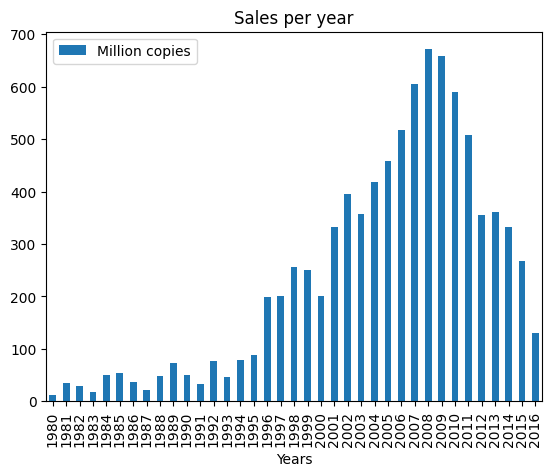

In [21]:
new_data.pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').plot.bar()
plt.title('Sales per year')
plt.legend(['Million copies'])
plt.xlabel('Years')
plt.show()

In [22]:
new_data = new_data.query("year_of_release > 1995")

Будем учитывать игры с 1996 года.

### Продажи по платформам

Посмотрим на график суммарных продаж по платформам.

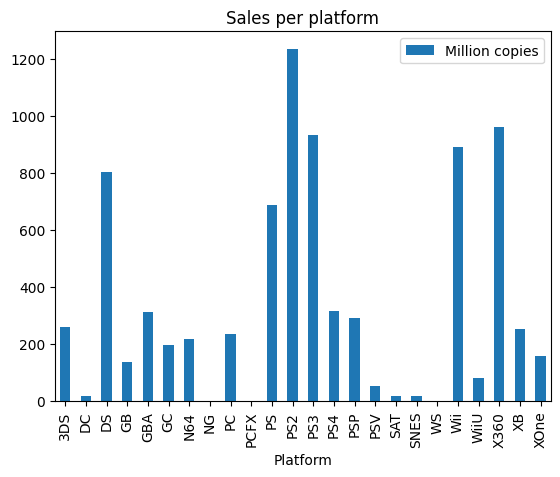

In [23]:
new_data.pivot_table(index='platform',values='total_sales',aggfunc='sum').plot.bar()
plt.title('Sales per platform')
plt.legend(['Million copies'])
plt.xlabel('Platform')
plt.show()

Самые популярные платформы DS, PS, PS2, PS3, Wii, X360

Посмотрим на их распределение продаж по годам.

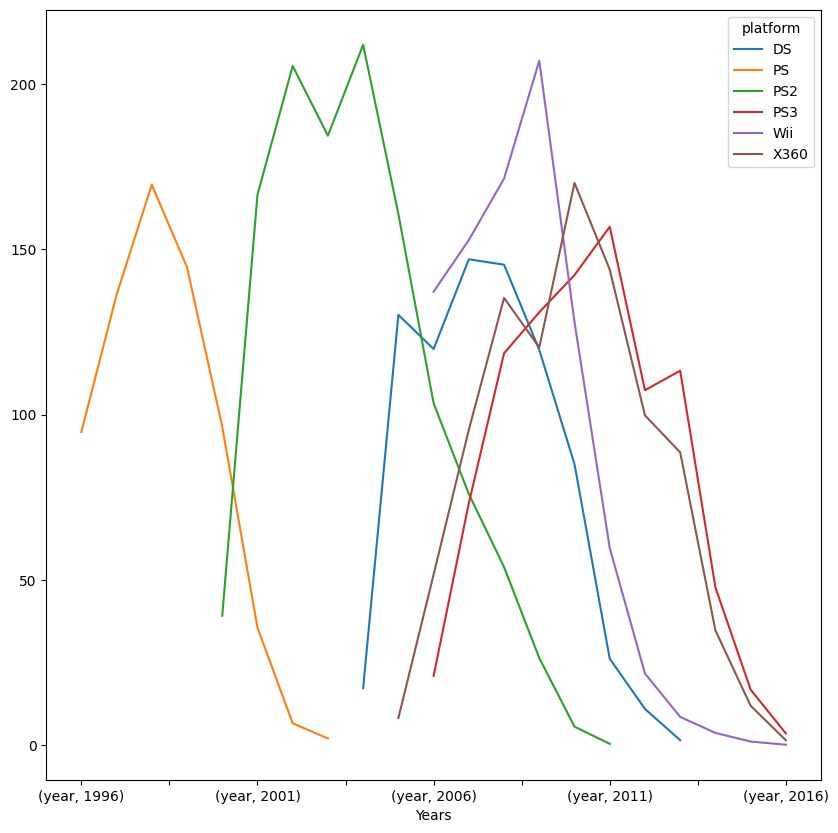

In [24]:
platforms_list = ['DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360']
new_data.query("@platforms_list in platform").groupby(['year_of_release','platform']).agg(year=('total_sales','sum')).unstack(level=0).T.plot(kind='line', subplots=False,figsize=(10,10))
plt.xlabel('Years')
plt.show()

**Вывод:** 

* В среднем платформы исчезают за 8-10 лет. 
* Новые платформы стали активнее появляться после 2005 года. 
* Новая платформа появляется обычно после снижения продаж старой это 3-5 лет.

### Актуальные период

Актуальный период это продажи игр на актуальные консоли. Для 2017 года возьмем данные с 2014 года, связав это с появлением новых платформ и исчезновений старых платформ.

In [25]:
actual_data = new_data.query("year_of_release > 2013 and platform != 'PSP'")

(0.0, 1.0)

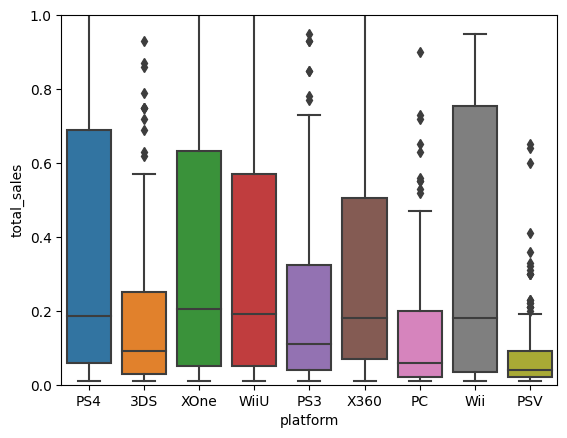

In [26]:
sns.boxplot(
    data = actual_data,
    y='total_sales',
    x='platform'
)
plt.ylim(0,1)

Самые популярные платформы PS3, X350, PS4 XOne, WiiU ,Wii. Во многих из них есть выбросы связаные с  высокими продажами.

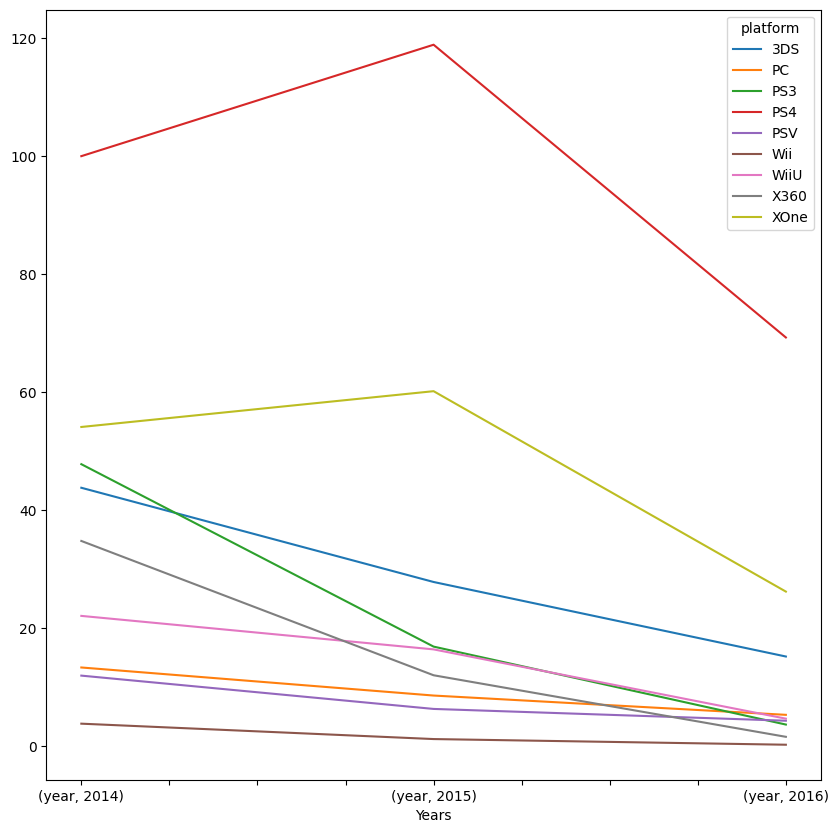

In [27]:
actual_data.groupby(['year_of_release','platform']).agg(year=('total_sales','sum')).unstack(level=0).T.plot(kind='line', subplots=False,figsize=(10,10))
plt.xlabel('Years')
plt.show()

* Продажи PS4, XOne растут - это новые платформы.
* Продажи PS3, X360, 3DS, Wii падают - это старые платформы.
* Продажи PC практически не меняются.
* Продажи WiiU имеются тенденцию к снижению, хоть это и новая платформа.

### Влияение отзывов на продажи

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами для популярных платформ.

total sales PS3 vs critic_score corr 0.44657460493190715


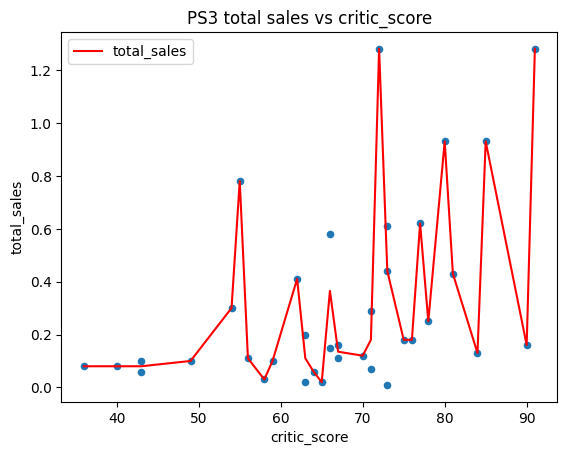

total sales PS3 vs user_score corr -0.166761413476621


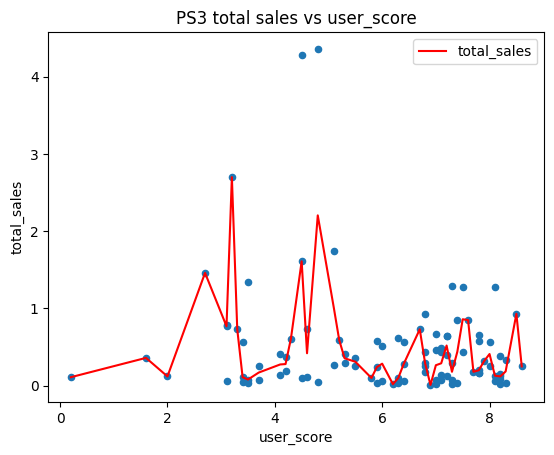

total sales PS4 vs critic_score corr 0.40266141068104117


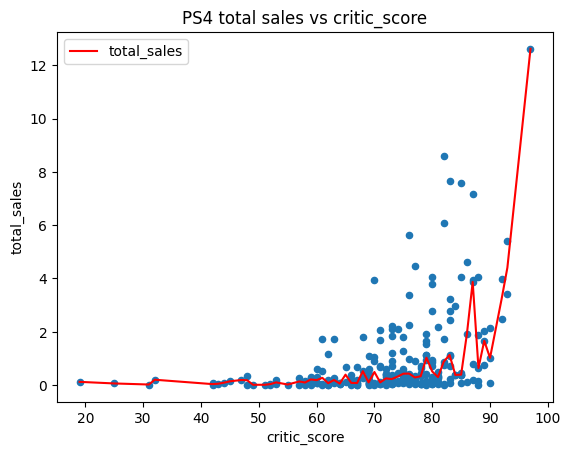

total sales PS4 vs user_score corr -0.040131589472697266


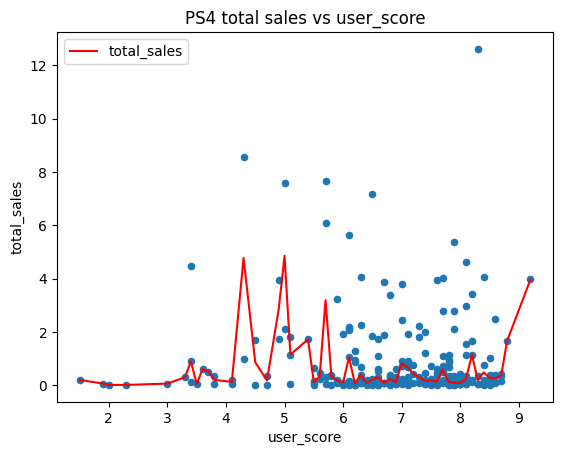

total sales X360 vs critic_score corr 0.5257228356581521


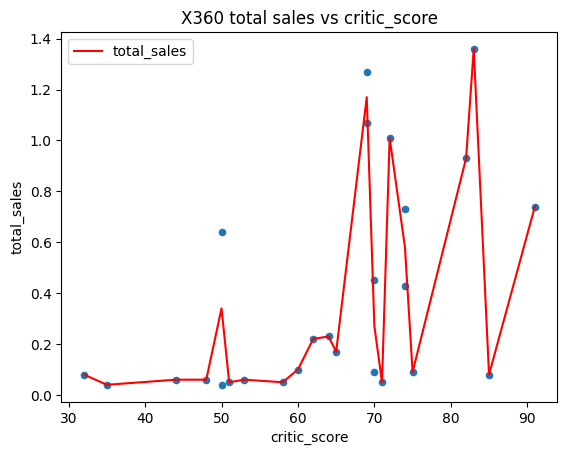

total sales X360 vs user_score corr -0.13844457094566506


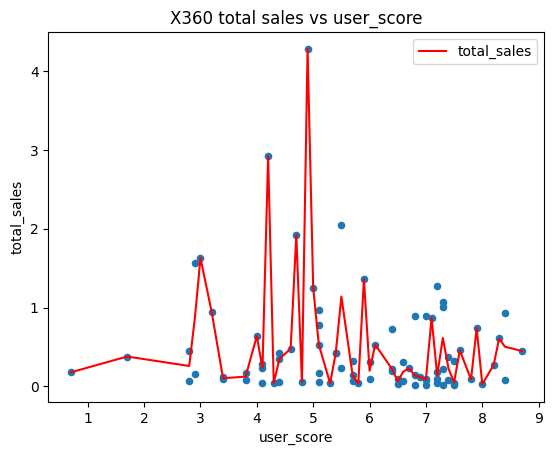

total sales XOne vs critic_score corr 0.428676943703332


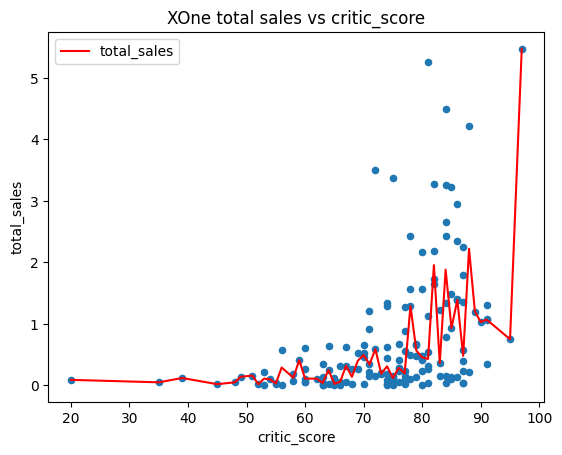

total sales XOne vs user_score corr -0.0703839280647581


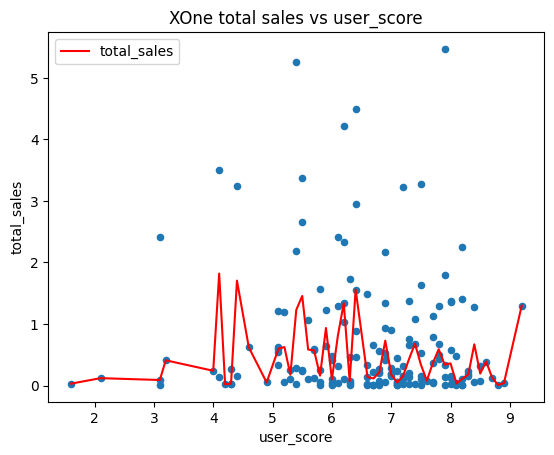

total sales WiiU vs critic_score corr 0.3702014124808841


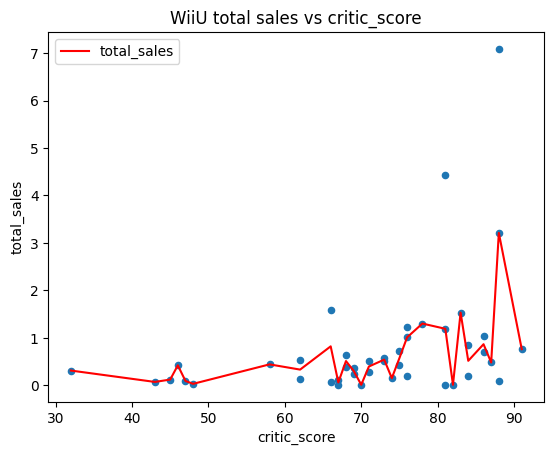

total sales WiiU vs user_score corr 0.40792645792170795


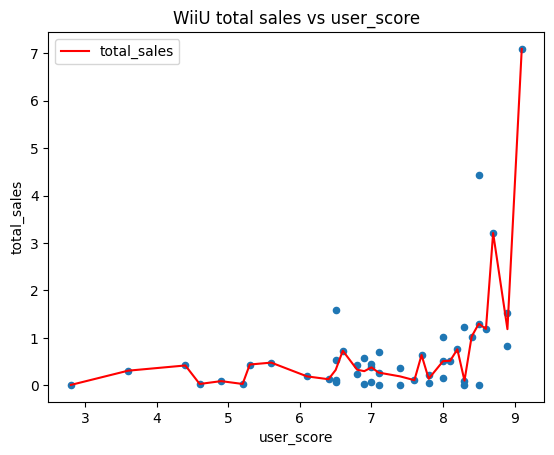

In [28]:
columns = ['critic_score','user_score']
platforms = ['PS3','PS4','X360','XOne','WiiU']
for platform in platforms:
    for column_name in columns:
        platform_data = actual_data.query("platform == @platform")
        ax = platform_data.plot(x=column_name,y='total_sales',kind='scatter')
        print(f'total sales {platform} vs {column_name} corr',platform_data[column_name].corr(platform_data['total_sales']))
        platform_data.pivot_table(index=column_name,values='total_sales',aggfunc='median').plot(ax=ax,color='red')
        plt.title((f'{platform} total sales vs {column_name}'))
        plt.show()

На продажи больше всего влияет оценка критиков. Так как это первые игроки в каждой игре. Однако оценки пользователей WiiU влияют на продажи на этой платформе больше, чем оценки критиков. Результаты записали в таблицу:

| Платформа | Корреляция оценки критиков | Корреляция оценки игроков | Влияние критиков на продажи | Влияние игроков на продажи
| --- | --- | --- | --- | --- |
PS3 | 0.44 | -0.16 | слабое | очень слабое
PS4 | 0.40 | -0.04 | слабое | очень слабое
X360 | 0.53 | -0.13 | среднее | очень слабое
XOne | 0.42 | -0.07 | слабое | очень слабое
WiiU | 0.37 | 0.41 | слабое | слабое

Для оценки влияния коэффициента корреляции использовалась шкала Чеддока:


| Значение | Интерпретация
| --- | --- |
 от 0 до 0,3 | очень слабая
 от 0,3 до 0,5 | слабая
 от 0, 5 до 0,7 | средняя
 от 0,7 до 0, 9 | высокая
 от 0,9 до 1 | очень высокая

### Распределение игр по жанрам

Посмотрим на распределение игр по жанрам

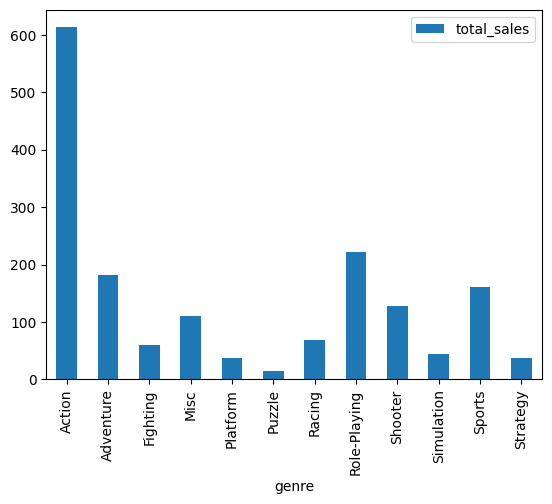

In [29]:
actual_data.pivot_table(index='genre',values='total_sales',aggfunc='count').plot(kind='bar')
plt.show()

Больше всего игр в жанре Action.

Посмотрим на распределение игр по жанрам в зависимости от продаж.

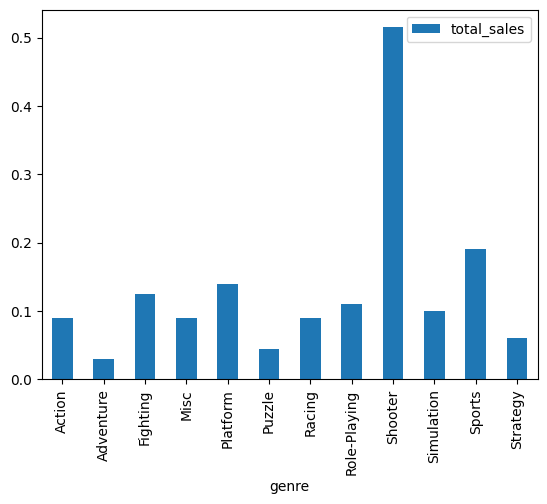

In [30]:
actual_data.pivot_table(index='genre',values='total_sales',aggfunc='median').plot(kind='bar')
plt.show()

Самые прибыльные игры это жанр Platform, Shooter, Sports.

**Вывод:**

С 1996 года по 2016 год:

* В среднем платформы исчезают за 8-10 лет. 
* Новые платформы стали активнее появляться после 2005 года. 
* Новая платформа появляется обычно после снижения продаж старой это 3-5 лет.


Для 2014-2016 годов:
* Самые популярные платформы PS3, X350, PS4 XOne, WiiU ,Wii
* Продажи PS4, XOne растут - это новые платформы.
* Продажи PS3, X360, 3DS, Wii падают - это старые платформы.
* Продажи PC практически не меняются.
* Продажи WiiU имеются тенденцию к снижению, хоть это и новая платформа.
* На продажи больше всего влияет оценка критиков. Так как это первые игроки в каждой игре.
* Больше всего игр в жанре Action.

* Самые прибыльные игры это жанр Platform, Shooter, Sports.

* Самый неприбыльный жанр это Adventure.

## Портрет пользователя каждого региона

Создадим функцию для создания графиков.

In [31]:
def get_pie(region_sales,value):

    actual_data.pivot_table(index=value,values=region_sales,aggfunc='sum').sort_values(region_sales).plot.pie(y=region_sales,legend=False,autopct='%1.1f%%',startangle=180)
    plt.title(f'{region_sales.split("_sales")[0].upper()} - {value}')
    plt.show()


### Cеверная Америка

Посмотрим на самые популярные платформы региона.

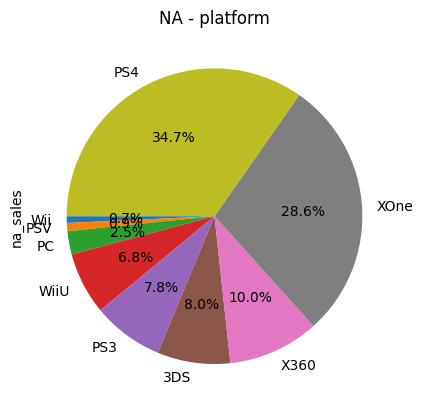

In [32]:
get_pie('na_sales','platform')

Посмотрим на самые популярные жанры региона.

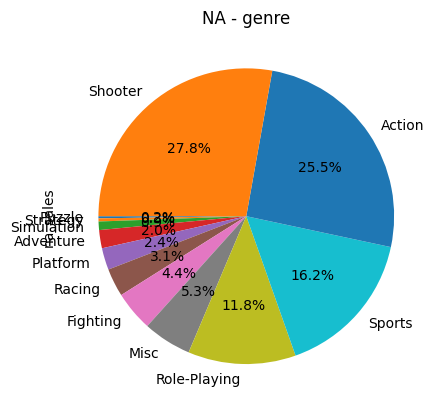

In [33]:
get_pie('na_sales','genre')

Посмотрим на самые популярные рейтинги ESRB.

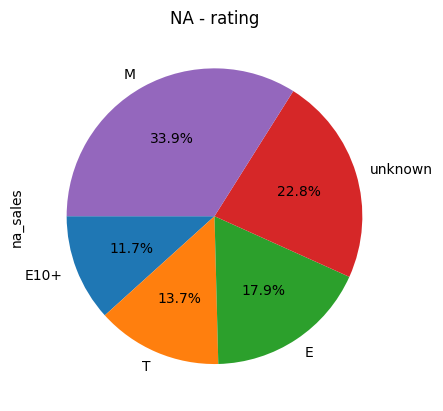

In [34]:
get_pie('na_sales','rating')

Северная Америка

Топ 5 платформ:
* PS4
* XOne
* X360
* PS3
* 3DS

Топ 5 жанров:
* Action
* Shooter
* Sports
* Role-Playing
* Misc

Самые популярные игры из рейтинга ESRB:

* для взрослых
* без рейтинга
* для всех.

### Европа

Посмотрим на самые популярные платформы региона.

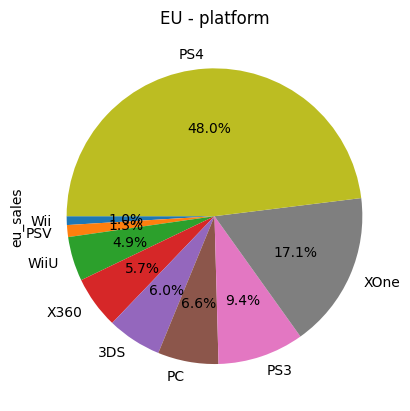

In [35]:
get_pie('eu_sales','platform')

Посмотрим на самые популярные жанры региона.

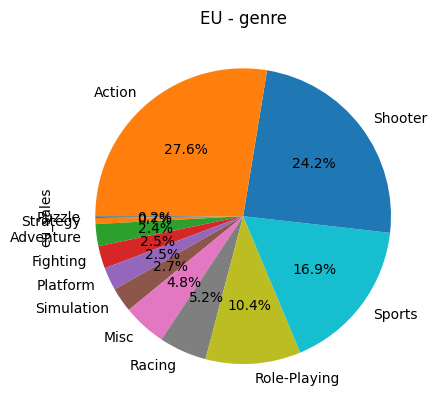

In [36]:
get_pie('eu_sales','genre')

Посмотрим на самые популярные рейтинги ESRB.

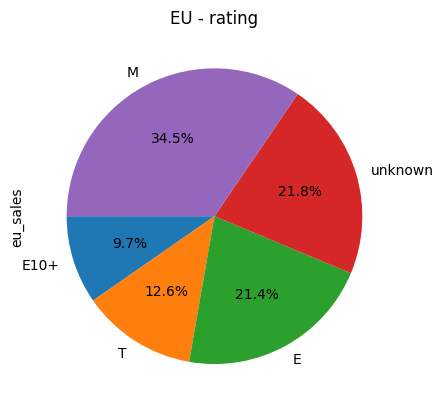

In [37]:
get_pie('eu_sales','rating')

Европа

Топ 5 платформ:
* PS4
* PS3
* XOne
* X360
* 3DS

Топ 5 жанров:
* Action
* Shooter
* Sports
* Role-Playing
* Racing

Самые популярные игры из рейтинга ESRB:

* для взрослых
* без рейтинга
* для всех.

### Япония

Посмотрим на самые популярные платформы региона.

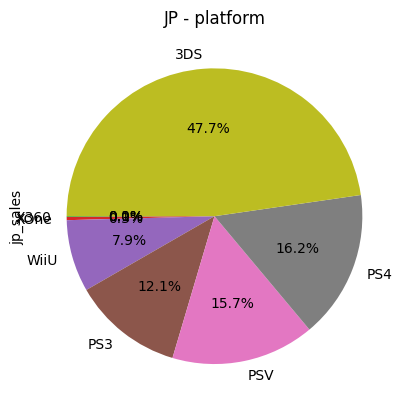

In [38]:
get_pie('jp_sales','platform')

Посмотрим на самые популярные жанры региона.

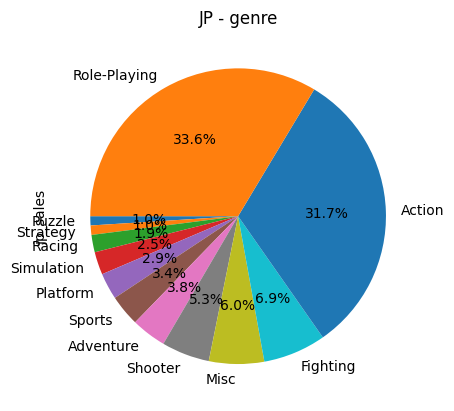

In [39]:
get_pie('jp_sales','genre')

Посмотрим на самые популярные рейтинги ESRB.

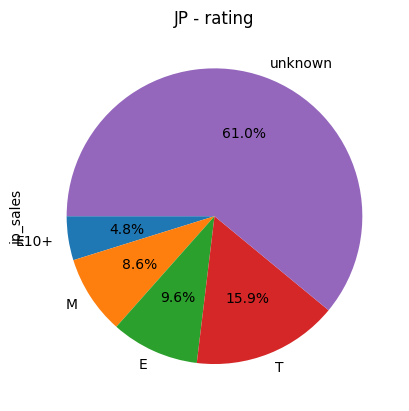

In [40]:
get_pie('jp_sales','rating')

Япония

Топ 5 платформ:
* 3DS
* PS3
* PSV
* PS4
* WiiU

Топ 5 жанров:
* Role-Playing
* Action
* Misc
* Fighting
* Shooter

Самые популярные игры из рейтинга ESRB:

* без рейтинга
* для подростков
* для всех

**Общий вывод по всем регионам**:

Каждый регион имеет различный топ платформ, жанров, зависимость продаж от рейтинга ESRB. EU и NA более схожие регионы, пользователи из JP имеют совсем другие предпочтения

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC

Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

```
H_0: Рейтинг пользователей (user_score) пользователей платформы PC = рейтинг пользователей (user_score) пользователей платформы XOne`
H_1: Рейтинг пользователей (user_score) пользователей платформы PC ≠ рейтинг пользователей (user_score) пользователей платформы XOne`
alpha = 0.01
```

In [41]:
alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
nona_data = actual_data.dropna()
results = st.ttest_ind(
    nona_data[nona_data['platform'] == 'PC']['user_score'], 
    nona_data[nona_data['platform'] == 'XOne']['user_score'], equal_var=False)
print(nona_data[nona_data['platform'] == 'PC']['user_score'].mean(),'PC mean score')
print(nona_data[nona_data['platform'] == 'PC']['user_score'].mean(),'XOne mean score')
print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

6.3417391304347825 PC mean score
6.3417391304347825 XOne mean score
0.1403785186826978
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action и Sports

Проверка гипотезы: cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные;

```
H_0: Средний рейтинг пользователей (user_score) в жанре Action ≠ рейтинг пользователей (user_score) в жанре Sports`
H_1: Средний рейтинг пользователей (user_score) в жанре Action = рейтинг пользователей (user_score) в жанре Sports`
alpha = 0.01
```

In [42]:
alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
    nona_data[nona_data['genre'] == 'Action']['user_score'], 
    nona_data[nona_data['genre'] == 'Sports']['user_score'], equal_var=False)
print(nona_data[nona_data['genre'] == 'Action']['user_score'].mean(),'Action mean score')
print(nona_data[nona_data['genre'] == 'Sports']['user_score'].mean(),'Sports mean score')
print(results.pvalue)

if results.pvalue > alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

6.832599118942731 Action mean score
5.68433734939759 Sports mean score
8.327612976032047e-09
Не получилось отвергнуть нулевую гипотезу


**Вывод:**
* Проверка гипотез начинается с формулировки нулевой гипотезы H₀. Например, «среднее генеральной совокупности равно A», где А — некоторое число.
Исходя из H₀ формулируется альтернативная гипотеза H₁. Это утверждение, которое принимается верным, если отбрасывается H₀. Оно может звучать так: «среднее генеральной совокупности не равно A». Такая альтернативная гипотеза называется двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны.
* Был использован специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: ```scipy.stats.ttest_ind (array1, array2, equal_var)```

## Общий вывод

<ol>
    <li>Предобработка данных:</li>
    <ul>
    <li> Исправлен формат данных в столбцах.</li>
    <li> Были удалены пропуски, которые не влияют на общую статистику. От начальных данных осталось 98,38</li>
    <li> Причинами появления пропусков могут быть ошибки ввода данных, недостаток информации, фрод.</li>
    <li> Добавлен столбец с общими продажами.</li>
    </ul>   
    <li>Исследовательский анализ данных:</li>
    <br>
    <b>С 1996 года по 2016 год:</b>
    <ul>
    <li> В среднем платформы исчезают за 8-10 лет.</li>
    <li> Новые платформы стали активнее появляться после 2005 года.</li>
    <li> Новая платформа появляется обычно после снижения продаж старой это 3-5 лет.</li>
    </ul>
    <br><b>Для 2014-2016 годов:</b>
    <ul>
    <li> Самые популярные платформы PS3, X350, PS4 XOne, WiiU ,Wii</li>
    <li> Продажи PS4, XOne растут - это новые платформы.</li>
    <li> Продажи PS3, X360, 3DS, Wii падают - это старые платформы.</li>
    <li> Продажи PC практически не меняются.</li>
    <li> Продажи WiiU имеются тенденцию к снижению, хоть это и новая платформа.</li>
    <li> На продажи больше всего влияет оценка критиков. Так как это первые игроки в каждой игре. Однако оценки пользователей WiiU влияют на продажи на этой платформе больше, чем оценки критиков. Результаты записали в таблицу:

| Платформа | Корреляция оценки критиков | Корреляция оценки игроков | Влияние критиков на продажи | Влияние игроков на продажи
| --- | --- | --- | --- | --- |
PS3 | 0.44 | -0.16 | слабое | очень слабое
PS4 | 0.40 | -0.04 | слабое | очень слабое
X360 | 0.53 | -0.13 | среднее | очень слабое
XOne | 0.42 | -0.07 | слабое | очень слабое
WiiU | 0.37 | 0.41 | слабое | слабое

Для оценки влияния коэффициента корреляции использовалась шкала Чеддока:


| Значение | Интерпретация
| --- | --- |
 от 0 до 0,3 | очень слабая
 от 0,3 до 0,5 | слабая
 от 0, 5 до 0,7 | средняя
 от 0,7 до 0, 9 | высокая
 от 0,9 до 1 | очень высокая
        
 </li>
    <br>    
    <br>    
    <li> Больше всего игр в жанре Action.</li>
    <li> Самые прибыльные игры это жанр Platform, Shooter, Sports.</li>
    <li> Самый неприбыльный жанр это Adventure.</li>
    </ul>
    <li>Портрет пользователя для каждого региона:</li>
    <br>
    <b>Северная Америка</b>
    <br>Топ 5 платформ:
    <ul>
    <li> PS4</li>
    <li> XOne</li>
    <li> X360</li>
    <li> PS3</li>
    <li> 3DS</li>
    </ul>
    Топ 5 жанров:
    <ul>
    <li> Action</li>
    <li> Shooter</li>
    <li> Sports</li>
    <li> Role-Playing</li>
    <li> Misc</li>
    </ul>
    Самые популярные игры из рейтинга ESRB:
    <ul>
    <li> для всех</li>
    <li> без рейтинга</li>
    <li> только для взрослых.</li>
    </ul>
    <br>
    <b>Европа</b>
    <br>Топ 5 платформ:
    <ul>
    <li> PS4</li>
    <li> PS3</li>
    <li> XOne</li>
    <li> X360</li>
    <li> 3DS</li>
    </ul>
    <br>Топ 5 жанров:
    <ul>
    <li> Action</li>
    <li> Shooter</li>
    <li> Sports</li>
    <li> Role-Playing</li>
    <li> Racing</li>
    </ul>
    <br>Самые популярные игры из рейтинга ESRB:
    <ul>
    <li> для всех</li>
    <li> без рейтинга</li>
    <li> только для взрослых.</li>
    </ul>
    <br>
    <b>Япония</b>
    <br>Топ 5 платформ:
    <ul>
    <li> 3DS</li>
    <li> PS3</li>
    <li> PSV</li>
    <li> PS4</li>
    <li> WiiU</li>
    </ul>
    <br>Топ 5 жанров:
    <ul>
    <li> Role-Playing</li>
    <li> Action</li>
    <li> Misc</li>
    <li> Fighting</li>
    <li> Shooter</li>
    </ul>
    <br>Самые популярные игры из рейтинга ESRB:
    <ul>
    <li> без рейтинга </li>
    <li> для подростков </li>
    <li> для всех </li>
    </ul>
    <br>
    <b>Общий вывод по всем регионам:</b>
    <br>
    <br>Каждый регион имеет различный топ платформ, жанров, зависимость продаж от рейтинга ESRB. EU и NA более схожие регионы, пользователи из JP имеют совсем другие предпочтения
    <br>
    <br>
    <li>Проверка гипотез:</li>
    <ul>
    <li> Был использован специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: <code>scipy.stats.ttest_ind (array1, array2, equal_var)</code></li>
    <li> Рейтинг пользователей (user_score) пользователей платформы PC = рейтинг пользователей (user_score) пользователей платформы XOne</li>
    <li> Рейтинг пользователей (user_score) в жанре Action ≠ рейтинг пользователей (user_score) в жанре Sports</li>
    </ul>
</ol>